In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# female's diabetes data
daibetes_df = pd.read_csv(r"D:\Projects\Diabetes_prediction\data\diabetes.csv")

In [3]:
daibetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
daibetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
daibetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
daibetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# splitting data
x = daibetes_df.drop(columns='Outcome',axis=0)
y = daibetes_df['Outcome']


# Data standardiazation

In [15]:
# Reason because all the features has values in a different scale , some are under 10, some are under 50 and some are under 100 or above

In [16]:
scaler = StandardScaler()

In [18]:
standardize_x = scaler.fit_transform(x)

In [19]:
standardize_x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
# updating x data 
x = standardize_x

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7,stratify=y)

# model training

In [32]:
model = svm.SVC(kernel='linear')

In [33]:
model

SVC(kernel='linear')

In [35]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
#finding Training data accuracy 
x_pred = model.predict(x_train)

In [43]:
train_accuracy = accuracy_score(x_pred,y_train)

In [44]:
print("accuracy with training data : ",train_accuracy)

accuracy with training data :  0.7817589576547231


In [45]:
#finding test data accuracy 
test_x_pred = model.predict(x_test)

In [47]:
test_accuracy = accuracy_score(test_x_pred,y_test)

In [48]:
print("accuracy with training data : ",test_accuracy)

accuracy with training data :  0.7792207792207793


# plotting predictions made with test data 

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

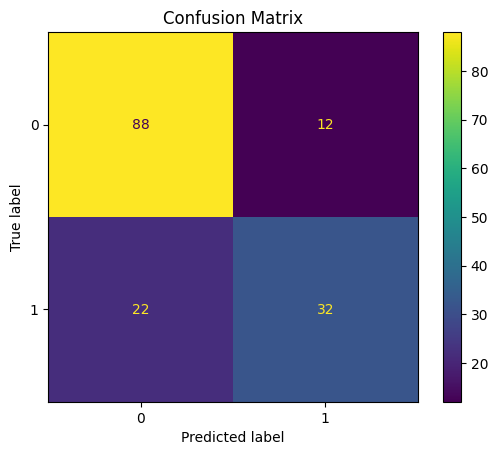

In [54]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_x_pred)
plt.title('Confusion Matrix')
plt.show()

# working on improving accuracy

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [56]:
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

In [57]:
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid, cv=5)

In [70]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [71]:
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 1}


In [72]:
y_pred = model.predict(x_test)

In [73]:
accuracy = accuracy_score(y_pred,y_test)

In [74]:
print("accuracy with training data : ",accuracy)

accuracy with training data :  0.7792207792207793
